# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

## 1.  Implement the intensity transformation 

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

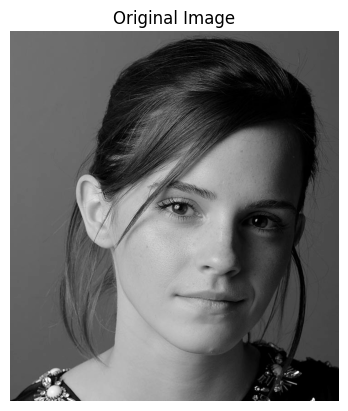

In [3]:
# Load the image in grayscale
image_path = 'a1images/emma.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [4]:
t1 = np.linspace(0, 50, 50).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))
t3 = np.linspace(150, 256, 106).astype('uint8')

lookup_table = np.concatenate([t1, t2, t3])

50
100


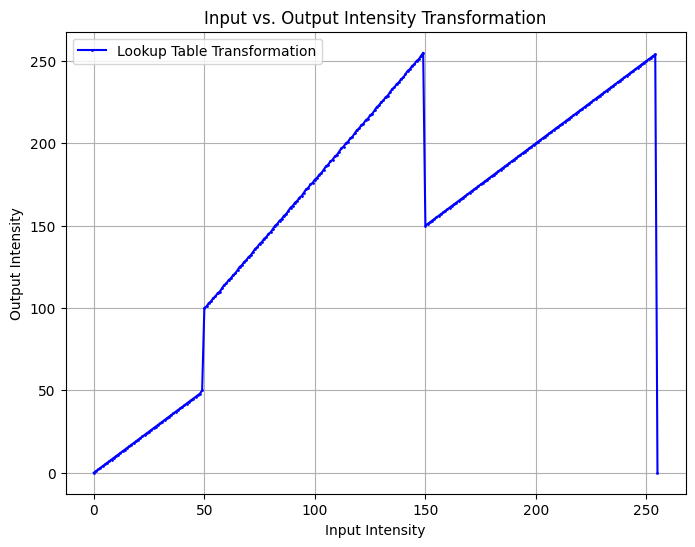

In [5]:
# Create an array representing the input intensities
input_values = np.arange(lookup_table.size)

# Plot the input and the corresponding output (transformed) intensities
plt.figure(figsize=(8, 6))
plt.plot(input_values, lookup_table, label='Lookup Table Transformation', color='blue', marker='o', markersize=1)

# Labeling the plot
plt.title('Input vs. Output Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [6]:
# Apply the transformation using the lookup table
transformed_image = cv2.LUT(image, lookup_table)

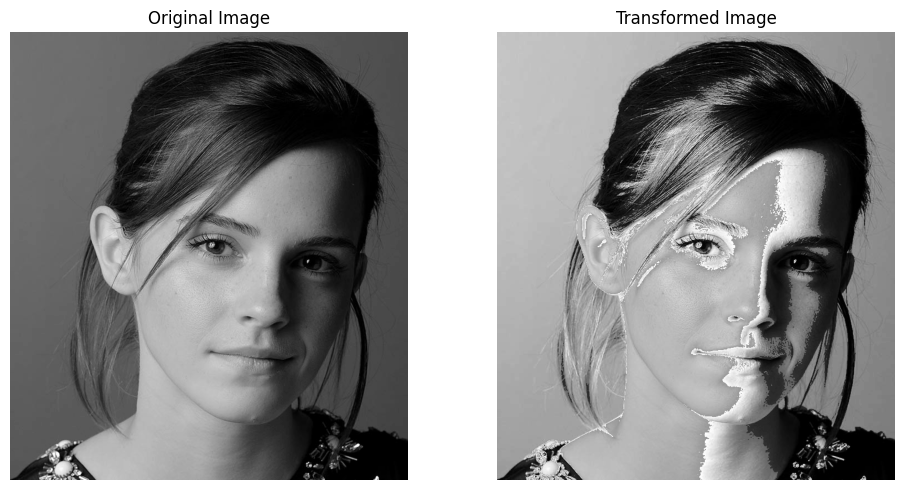

In [7]:
# Display the original and transformed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 2. Accentuate white and grey matter

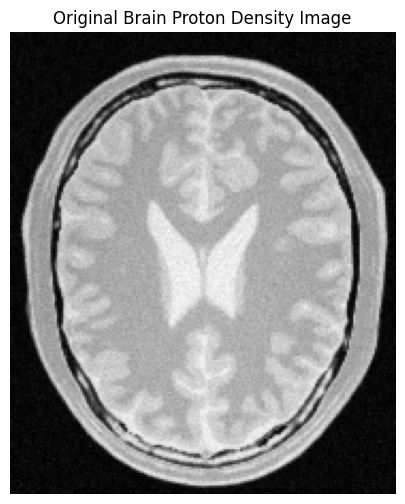

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = 'a1images/brain_proton_density_slice.png'
image_brain = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image_brain, cmap='gray')
plt.title("Original Brain Proton Density Image")
plt.axis('off')
plt.show()

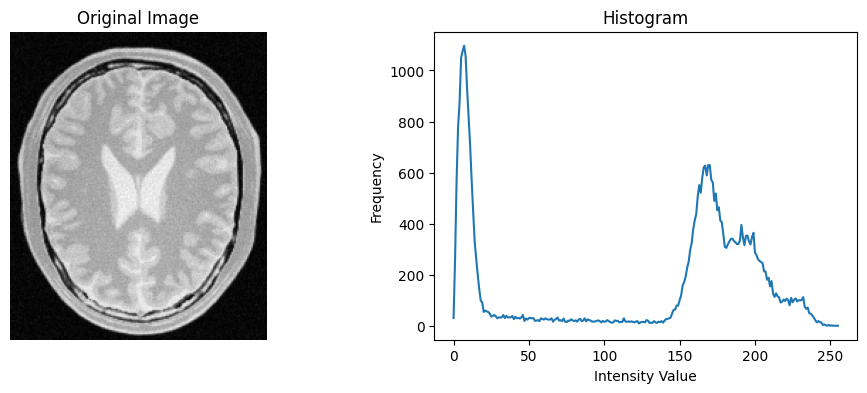

In [9]:
hist, bins = np.histogram(image_brain.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(image_brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

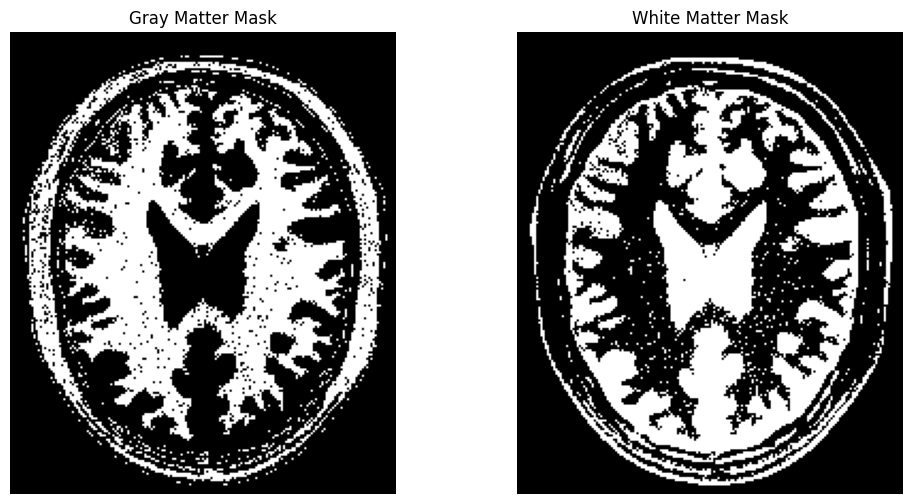

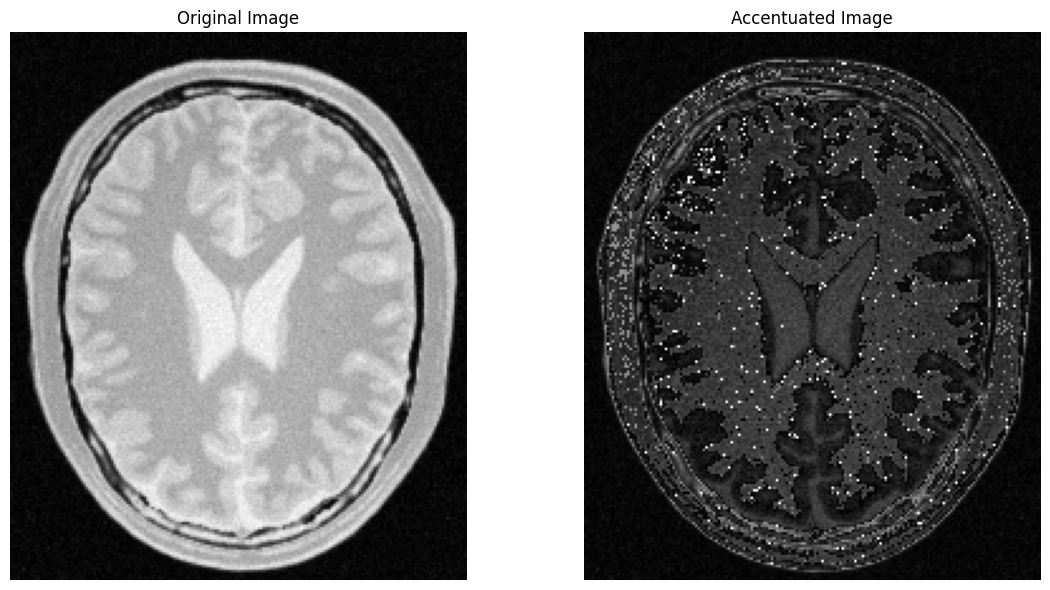

In [10]:
def accentuate_matter(image):
    # Cretae a copy of image
    image_accentuated = np.copy(image)

    #Apply transformation for gray matter 150 to 180
    gray_matter_mask = (image >= 150) & (image <= 180)
    image_accentuated[gray_matter_mask] = 1.7 * image_accentuated[gray_matter_mask] + 30

    # Apply transformation for white matter 100 to 250
    white_matter_mask = (image >= 180) & (image <= 250)
    image_accentuated[white_matter_mask] = 1.3 * image_accentuated[white_matter_mask] + 20

    return image_accentuated, gray_matter_mask, white_matter_mask

# Apply the accentuation transformation
image_accentuated, gray_matter_mask, white_matter_mask = accentuate_matter(image_brain)

# Display the masks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_matter_mask, cmap='gray')
plt.title("Gray Matter Mask")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(white_matter_mask, cmap='gray')
plt.title("White Matter Mask")
plt.axis('off')

# Display the original and transformed images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_brain, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_accentuated, cmap='gray')
plt.title("Accentuated Image")
plt.axis('off')

plt.tight_layout()
plt.show()


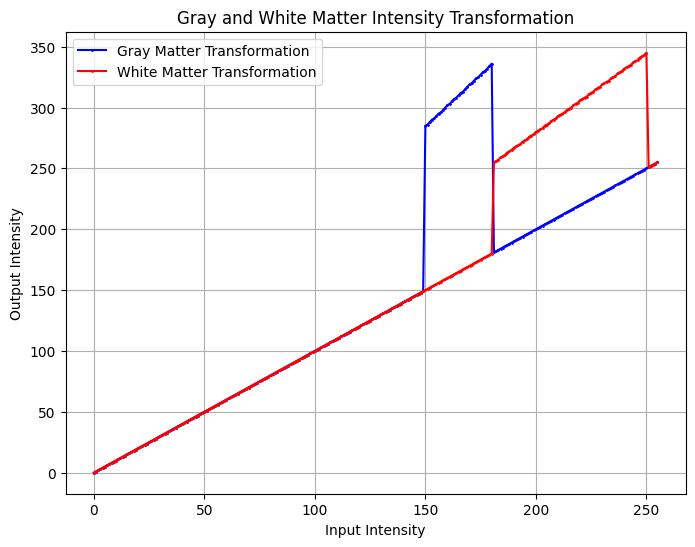

In [11]:
# plot intensity transformation of white and gray matter on same plot
input_values = np.arange(256)
output_values_gray = np.copy(input_values)
output_values_gray[150:181] = 1.7 * output_values_gray[150:181] + 30

output_values_white = np.copy(input_values)
output_values_white[181:251] = 1.3 * output_values_white[181:251] + 20

plt.figure(figsize=(8, 6))
plt.plot(input_values, output_values_gray, label='Gray Matter Transformation', color='blue', marker='o', markersize=1)
plt.plot(input_values, output_values_white, label='White Matter Transformation', color='red', marker='o', markersize=1)

plt.title('Gray and White Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.legend()
plt.show()

## Gamma correction

### Apply gamma correction with gamma = 0.7

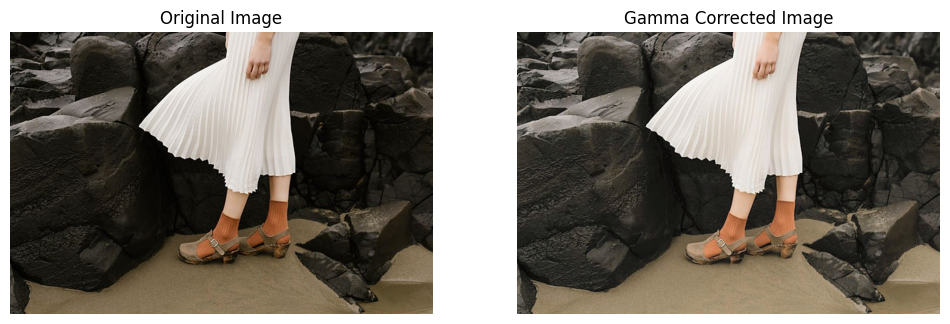

In [22]:
# Load the image
image_path = 'a1images\highlights_and_shadows.jpg'
image = cv2.imread(image_path)

# Convert the image from BGR to Lab color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Split the Lab image into L, a, b channels
L, a, b = cv2.split(lab_image)

# Apply gamma correction to the L channel
gamma = 0.7
L_corrected = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the corrected L channel back with a and b
lab_corrected = cv2.merge([L_corrected, a, b])

# Convert the Lab image back to BGR color space
image_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_Lab2BGR)

# Display the original and corrected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_corrected, cv2.COLOR_BGR2RGB))
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.show()


### Histrogram visaulization

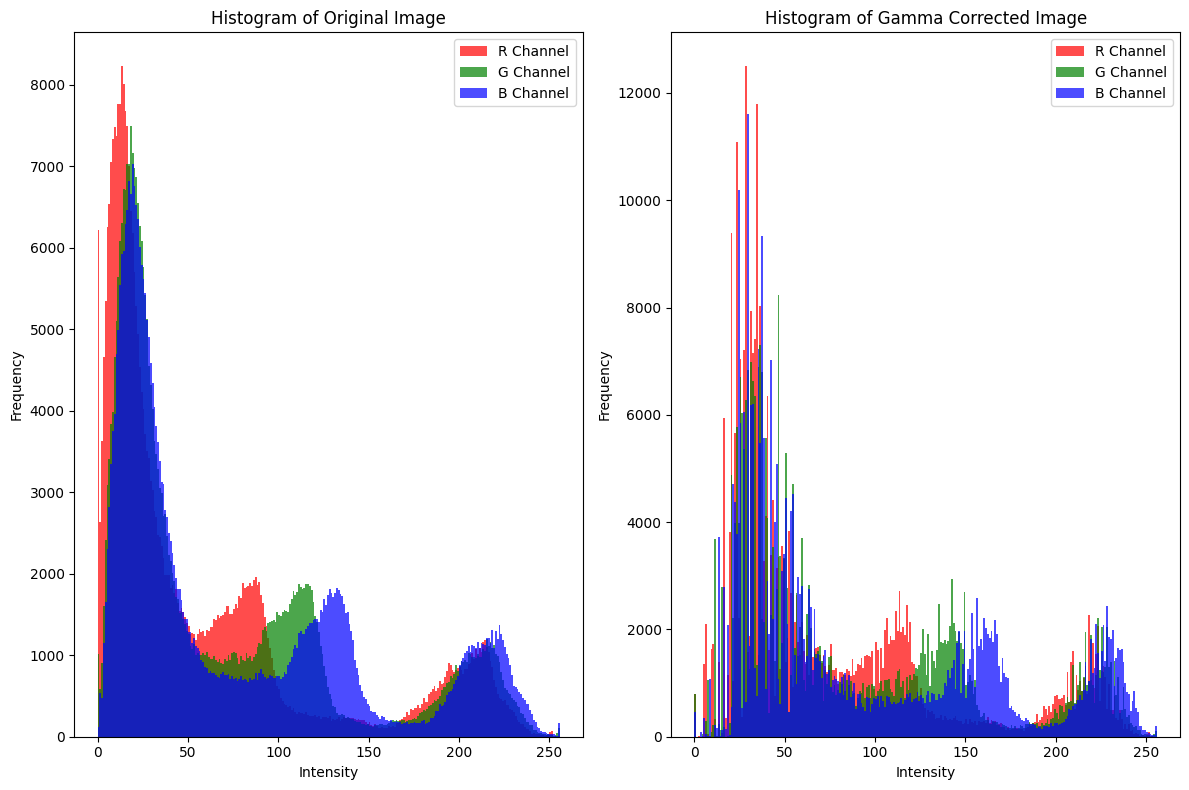

In [21]:
# Define colors and channel IDs
colors = ('r', 'g', 'b')
channel_ids = (0, 1, 2)

# Create a figure for the histograms
plt.figure(figsize=(12, 8))

# Histogram for the original image
plt.subplot(1, 2, 1)
for i, color in zip(channel_ids, colors):
    plt.hist(image[:, :, i].ravel(), bins=256, range=(0, 256), color=color, alpha=0.7, label=f'{color.upper()} Channel')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

# Histogram for the corrected image
plt.subplot(1, 2, 2)
for i, color in zip(channel_ids, colors):
    plt.hist(image_corrected[:, :, i].ravel(), bins=256, range=(0, 256), color=color, alpha=0.7, label=f'{color.upper()} Channel')
plt.title('Histogram of Gamma Corrected Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## 4. Vibrance analysis

## 5. Histogram equalization

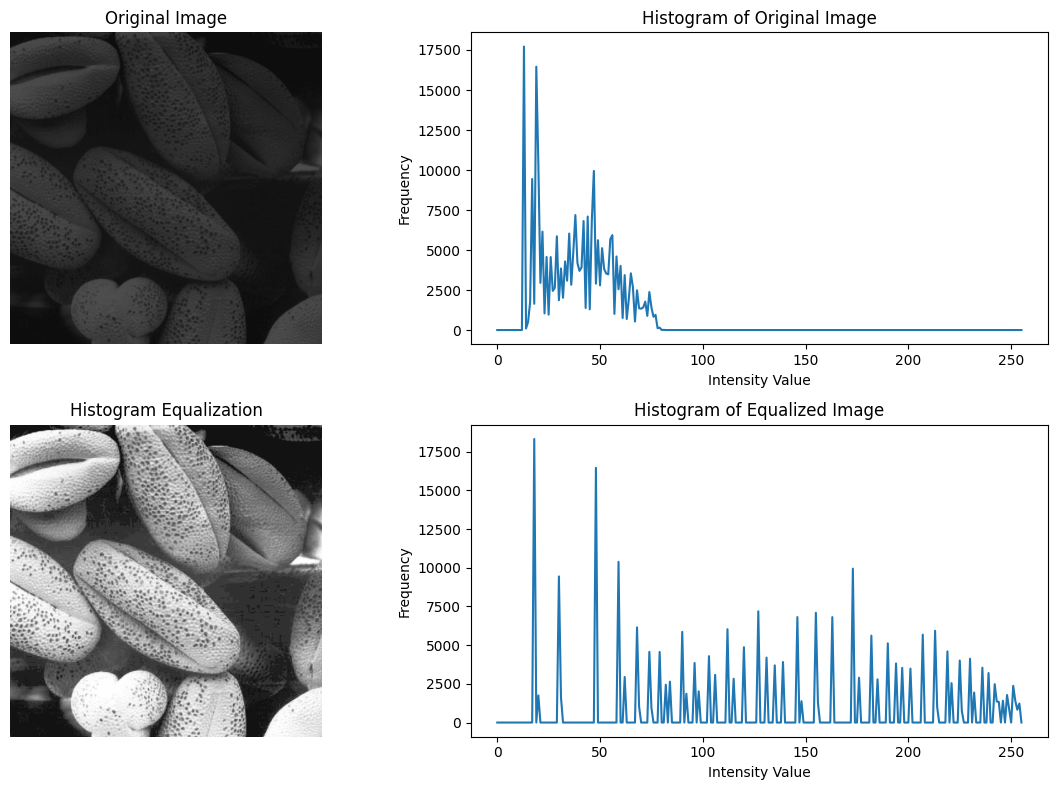

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image_path):
    # Load the image in grayscale
    f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    M, N = f.shape
    L = 256
    
    # Calculate histogram and cumulative distribution function (CDF)
    hist, bins = np.histogram(f.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    
    # Create the lookup table
    t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
    
    # Apply the transformation
    g = t[f]
    
    # Plot the original and equalized images along with their histograms
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    
    # Original image
    ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
    ax[0, 0].set_title('Original Image')
    ax[0, 0].axis('off')
    
    # Histogram of original image
    ax[0, 1].plot(hist)
    ax[0, 1].set_title('Histogram of Original Image')
    ax[0, 1].set_xlabel('Intensity Value')
    ax[0, 1].set_ylabel('Frequency')
    
    # Equalized image
    ax[1, 0].imshow(g, cmap='gray', vmin=0, vmax=255)
    ax[1, 0].set_title('Histogram Equalization')
    ax[1, 0].axis('off')
    
    # Histogram of equalized image
    hist_eq, bins_eq = np.histogram(g.ravel(), 256, [0, 256])
    ax[1, 1].plot(hist_eq)
    ax[1, 1].set_title('Histogram of Equalized Image')
    ax[1, 1].set_xlabel('Intensity Value')
    ax[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Call the function with the image path
histogram_equalization('a1images/shells.tif')